<a href="https://colab.research.google.com/github/jajapuramshivasai/DAI-101/blob/main/Univariate_and__Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

───────────────────────────────
## Import Libraries and Download Dataset
───────────────────────────────

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
import kagglehub

path = kagglehub.dataset_download("hhenry/finance-factoring-ibm-late-payment-histories")

print("Path to dataset files:", path)

100%|██████████| 56.8k/56.8k [00:00<00:00, 2.19MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hhenry/finance-factoring-ibm-late-payment-histories/versions/1


───────────────────────────────
##Data Exploration

───────────────────────────────

In [4]:
# Read the CSV file and parse dates for appropriate columns
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        try:
            df = pd.read_csv(filepath,
                  parse_dates=['PaperlessDate', 'InvoiceDate', 'DueDate', 'SettledDate'])
            print(f"Successfully imported {filename}")
            display(df.head())
            break
        except Exception as e:
            print(f"Error importing {filename}: {e}")
else:
    print("No CSV files found in the specified directory.")

Successfully imported WA_Fn-UseC_-Accounts-Receivable.csv


,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4


In [5]:
#Create an additional feature "InvoiceMonth" from the InvoiceDate column
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [6]:
#Display the first few rows and basic info
print("First 5 rows of the dataset:")
df.head()  #

First 5 rows of the dataset:


,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,InvoiceMonth
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,2013-01
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,2013-01
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,2013-07
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,2013-02
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,2012-10


In [7]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    2466 non-null   int64         
 1   customerID     2466 non-null   object        
 2   PaperlessDate  2466 non-null   datetime64[ns]
 3   invoiceNumber  2466 non-null   int64         
 4   InvoiceDate    2466 non-null   datetime64[ns]
 5   DueDate        2466 non-null   datetime64[ns]
 6   InvoiceAmount  2466 non-null   float64       
 7   Disputed       2466 non-null   object        
 8   SettledDate    2466 non-null   datetime64[ns]
 9   PaperlessBill  2466 non-null   object        
 10  DaysToSettle   2466 non-null   int64         
 11  DaysLate       2466 non-null   int64         
 12  InvoiceMonth   2466 non-null   period[M]     
dtypes: datetime64[ns](4), float64(1), int64(4), object(3), period[M](1)
memory usage: 250.6+ KB


In [8]:
print("\nSummary Statistics :")
df.describe()


Summary Statistics :


,countryCode,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,SettledDate,DaysToSettle,DaysLate
count,2466.000000,2466,2.466000e+03,2466,2466,2466.000000,2466,2466.00000,2466.000000
mean,620.446067,2012-12-24 15:41:53.868613120,4.978431e+09,2012-12-19 14:56:21.021897728,2013-01-18 14:56:21.021897728,59.895856,2013-01-15 01:36:56.058394112,26.44485,3.442417
min,391.000000,2012-01-09 00:00:00,6.113650e+05,2012-01-03 00:00:00,2012-02-02 00:00:00,5.260000,2012-01-13 00:00:00,0.00000,0.000000
25%,406.000000,2012-07-31 00:00:00,2.528854e+09,2012-07-02 00:00:00,2012-08-01 00:00:00,46.400000,2012-07-30 00:00:00,18.00000,0.000000
50%,770.000000,2012-12-31 00:00:00,4.964228e+09,2012-12-22 00:00:00,2013-01-21 00:00:00,60.560000,2013-01-15 00:00:00,26.00000,0.000000
75%,818.000000,2013-06-03 00:00:00,7.494512e+09,2013-06-05 00:00:00,2013-07-05 00:00:00,73.765000,2013-07-02 00:00:00,35.00000,5.000000
max,897.000000,2013-11-27 00:00:00,9.990244e+09,2013-12-02 00:00:00,2014-01-01 00:00:00,128.280000,2014-01-09 00:00:00,75.00000,45.000000
std,215.933610,NaN,2.884272e+09,NaN,NaN,20.435838,NaN,12.33493,6.290607


─────────────────────────────
#UNIVARIATE ANALYSIS
─────────────────────────────

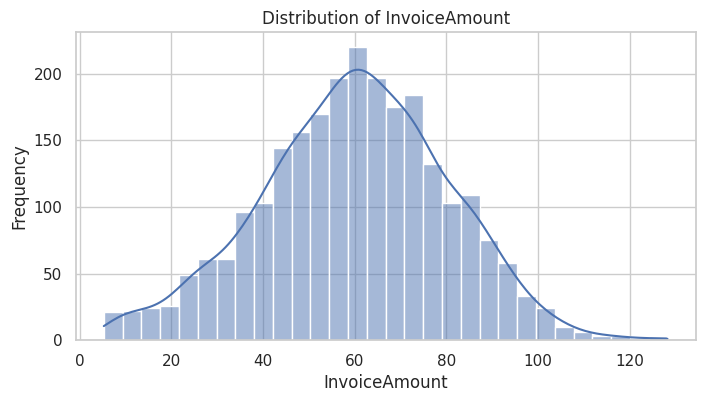

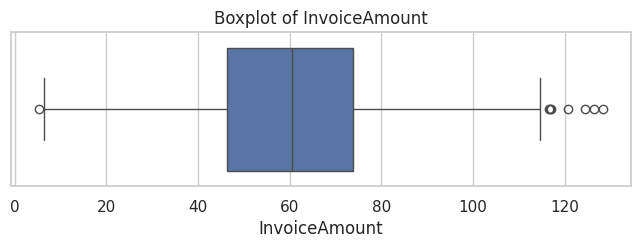

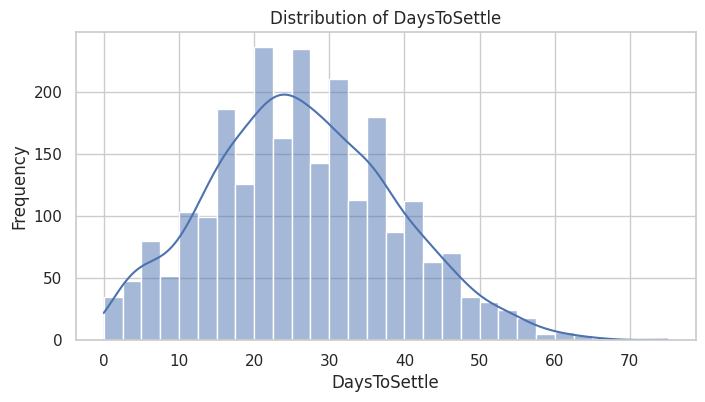

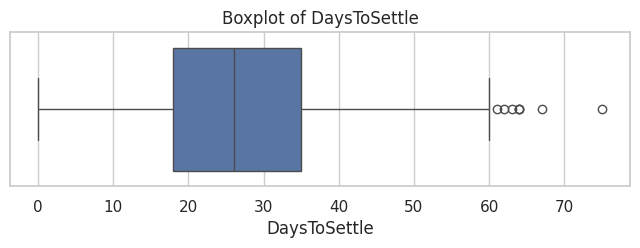

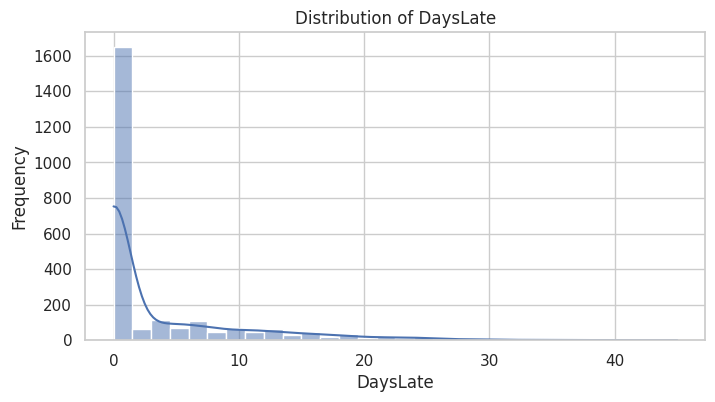

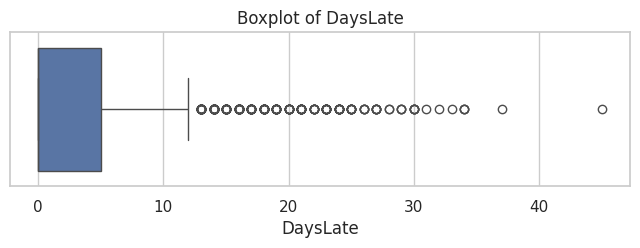

In [9]:
# List of numeric columns to analyze
numeric_columns = ['InvoiceAmount', 'DaysToSettle', 'DaysLate']

for col in numeric_columns:
    # Histogram with a KDE curve
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # Box plot to check for outliers
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Value counts for countryCode:
countryCode
391    616
406    561
770    506
897    396
818    387
Name: count, dtype: int64


<ipython-input-10-2118ba28109e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


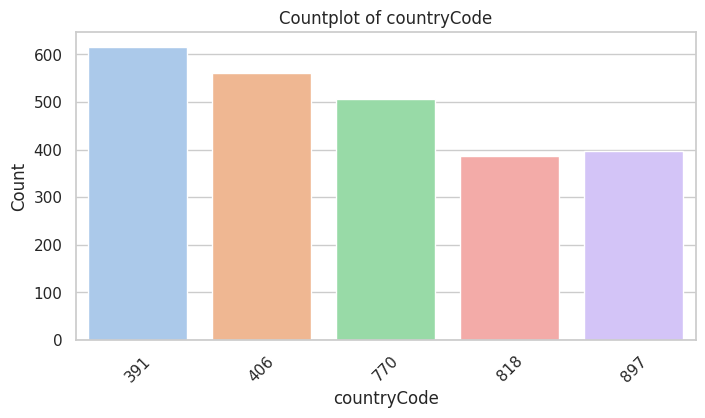


Value counts for Disputed:
Disputed
No     1905
Yes     561
Name: count, dtype: int64


<ipython-input-10-2118ba28109e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


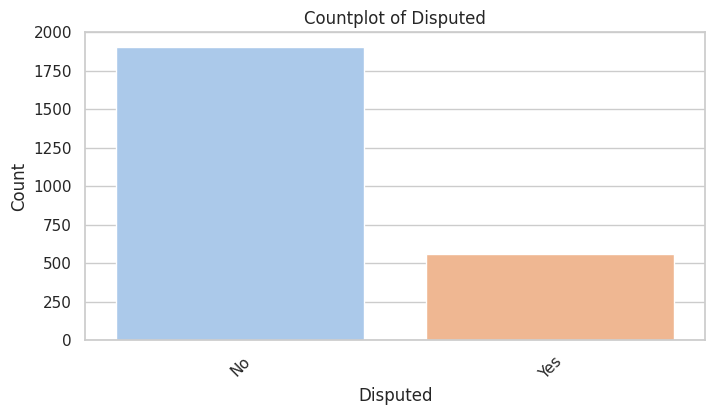


Value counts for PaperlessBill:
PaperlessBill
Paper         1263
Electronic    1203
Name: count, dtype: int64


<ipython-input-10-2118ba28109e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


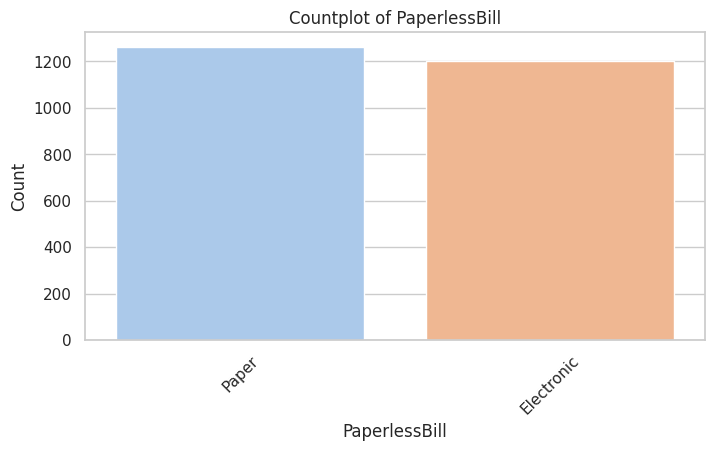


Value counts for InvoiceMonth:
InvoiceMonth
2013-05    125
2012-09    122
2013-09    118
2012-03    117
2012-12    113
2012-05    112
2013-04    112
2012-11    112
2013-01    111
2012-07    109
2012-10    108
2013-07    107
2013-03    106
2013-11    105
2013-08    103
2012-08    102
2013-02    100
2013-06     99
2012-06     98
2012-02     97
2012-04     97
2013-10     94
2012-01     90
2013-12      9
Freq: M, Name: count, dtype: int64


<ipython-input-10-2118ba28109e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


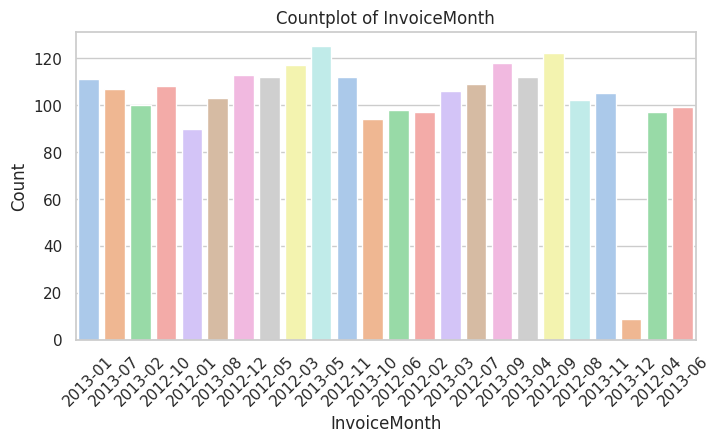

In [10]:
# List of categorical columns to analyze
categorical_columns = ['countryCode', 'Disputed', 'PaperlessBill', 'InvoiceMonth']

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

─────────────────────────────
#MULTIVARIATE ANALYSIS
─────────────────────────────

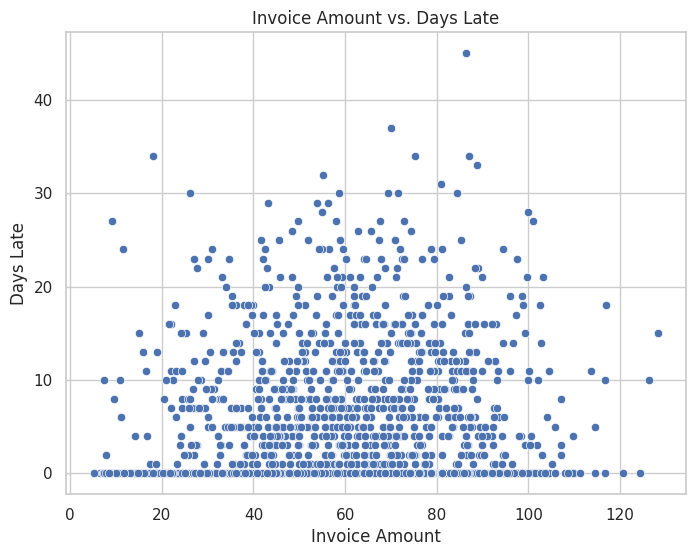

In [11]:
# Scatter Plot: Invoice Amount vs. Days Late
plt.figure(figsize=(8, 6))
sns.scatterplot(x='InvoiceAmount', y='DaysLate', data=df)
plt.title("Invoice Amount vs. Days Late")
plt.xlabel("Invoice Amount")
plt.ylabel("Days Late")
plt.show()

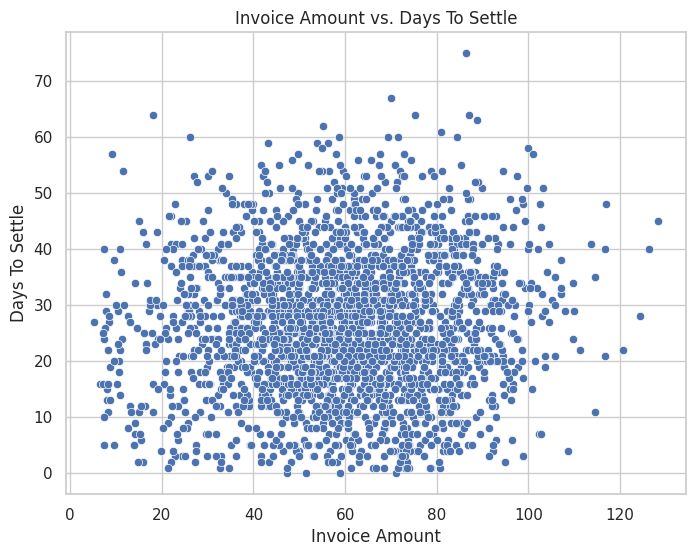

In [12]:
# Scatter Plot: Invoice Amount vs. Days To Settle
plt.figure(figsize=(8, 6))
sns.scatterplot(x='InvoiceAmount', y='DaysToSettle', data=df)
plt.title("Invoice Amount vs. Days To Settle")
plt.xlabel("Invoice Amount")
plt.ylabel("Days To Settle")
plt.show()

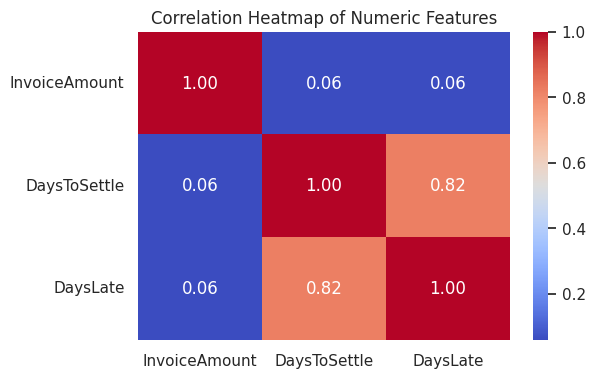

In [13]:
# Correlation Heatmap for numeric features
corr_mat = df[numeric_columns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

<ipython-input-14-59a8240c9771>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='countryCode', y='DaysLate', data=df, palette="Set2")


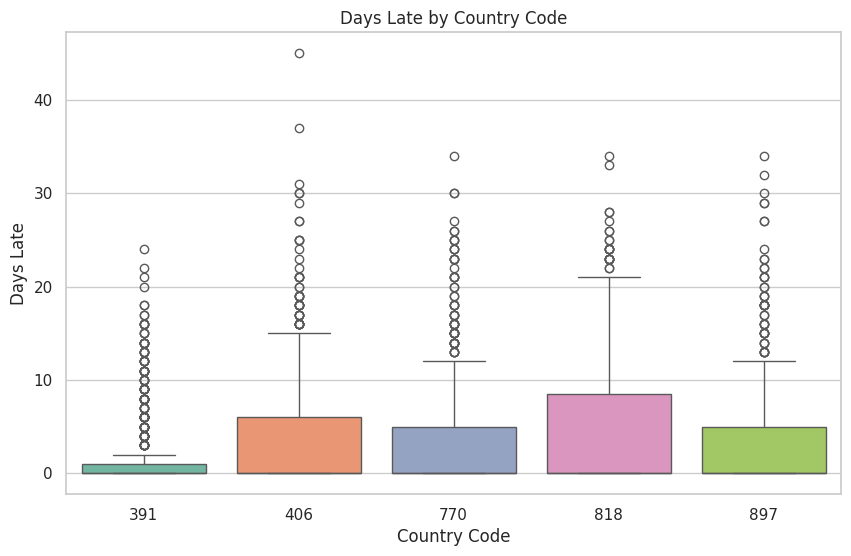

In [14]:
# Box Plot: Days Late by Country Code
plt.figure(figsize=(10, 6))
sns.boxplot(x='countryCode', y='DaysLate', data=df, palette="Set2")
plt.title("Days Late by Country Code")
plt.xlabel("Country Code")
plt.ylabel("Days Late")
plt.show()

<ipython-input-15-68b565de90bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PaperlessBill', y='DaysLate', data=df, palette="Set3")


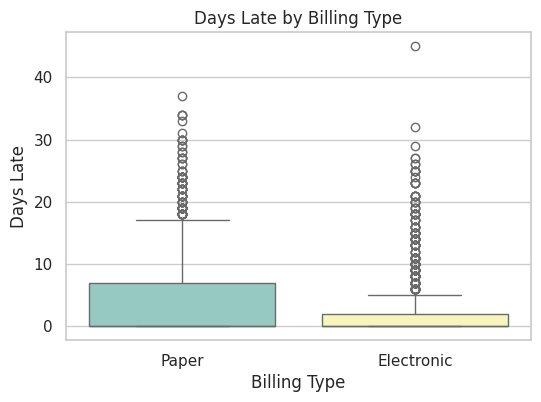

In [15]:
# Box Plot: Days Late by Billing Type (Paper vs. Electronic)
plt.figure(figsize=(6, 4))
sns.boxplot(x='PaperlessBill', y='DaysLate', data=df, palette="Set3")
plt.title("Days Late by Billing Type")
plt.xlabel("Billing Type")
plt.ylabel("Days Late")
plt.show()


<ipython-input-16-14b2c1d39601>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disputed', y='DaysLate', data=df, palette="Set1")


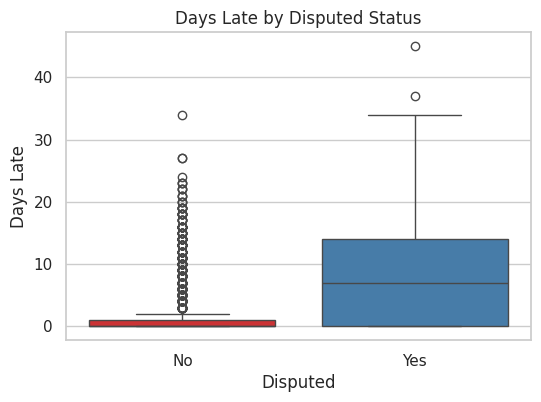

In [16]:
# Box Plot: Days Late by Dispute Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Disputed', y='DaysLate', data=df, palette="Set1")
plt.title("Days Late by Disputed Status")
plt.xlabel("Disputed")
plt.ylabel("Days Late")
plt.show()

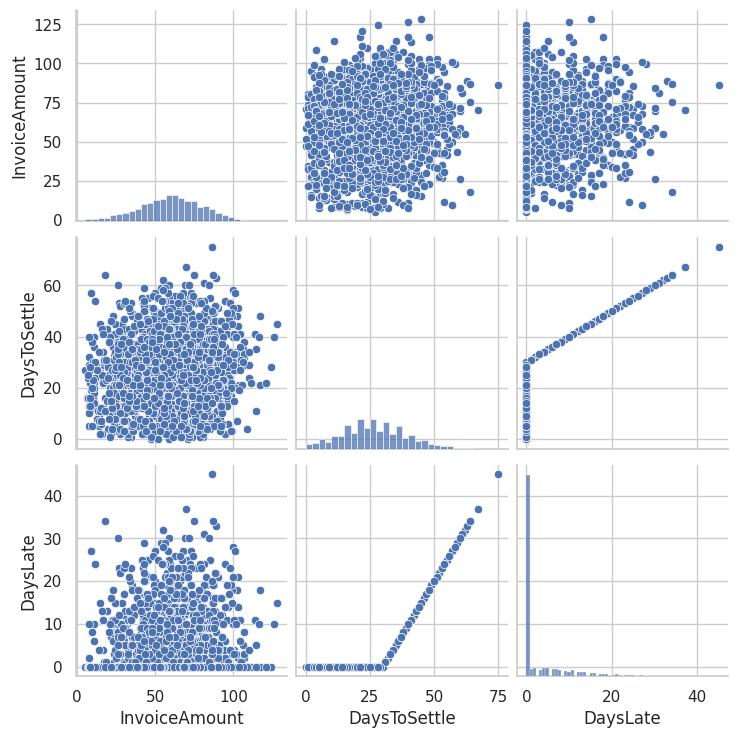

In [17]:
sns.pairplot(df[numeric_columns])
plt.show()